# 03 - ACB - Analizando datos
<hr>

In [4]:
# Librerías generales.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargamos los datos y echamos un vistazo a su tamaño, a sus campos y tipos de datos.
filepath="csv/infoEstadisticasACB_2019.csv"
dt_datos=pd.read_csv(filepath, delimiter=",", encoding = "ISO-8859-1")

In [3]:
# Un vistazo:
dt_datos.head()

,Temporada,Jornada,Equipo,LoV,Minutos,Puntos,T1,%T1,T2,%T2,T3,%T3,T,Valoración,Puntos_1C,Puntos_2C,Puntos_3C,Puntos_4C,Puntos_PR
0,2019,1,MKF,L,200:00,76,6/16,38%,23/39,59%,8/27,30%,34,77,22.0,19.0,15.0,20.0,
1,2019,1,SPB,V,200:00,87,19/26,73%,16/30,53%,12/30,40%,37,89,20.0,30.0,19.0,18.0,
2,2019,1,BAX,L,200:00,79,10/14,71%,15/32,47%,13/31,42%,42,86,20.0,15.0,23.0,21.0,
3,2019,1,UNI,V,200:00,69,13/16,81%,16/38,42%,8/29,28%,35,68,14.0,10.0,19.0,26.0,
4,2019,1,IBT,L,200:00,67,14/16,88%,19/37,51%,5/28,18%,43,65,14.0,21.0,12.0,20.0,


In [5]:
# Tipos de datos y cantidad de valores nulos:
dt_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 19 columns):
Temporada     476 non-null int64
Jornada       476 non-null int64
Equipo        476 non-null object
LoV           476 non-null object
Minutos       476 non-null object
Puntos        476 non-null int64
T1            476 non-null object
%T1           476 non-null object
T2            476 non-null object
%T2           476 non-null object
T3            476 non-null object
%T3           476 non-null object
T             476 non-null int64
Valoración    476 non-null int64
Puntos_1C     464 non-null float64
Puntos_2C     464 non-null float64
Puntos_3C     464 non-null float64
Puntos_4C     464 non-null float64
Puntos_PR     476 non-null object
dtypes: float64(4), int64(5), object(10)
memory usage: 70.7+ KB


Algunos de los datos tienen un formato que no nos va a permitir analizarlos correctamente. Por ejemplo:

 * Los campos T1, T2 y T3 vienen con formato "10/15" Aciertos respecto a totales.
 * Los campos de porcentajes vienen con el símbolo "%".
 
Vamos a modificar estos datos para que podamos analizarlos correctamente.


In [6]:
dt_datos["T1_Aciertos"] = dt_datos["T1"].str.split("/",expand=True)[0].astype(int)
dt_datos["T1_Tiros"] = dt_datos["T1"].str.split("/",expand=True)[1].astype(int)
dt_datos["T1_Fallos"] = (dt_datos["T1_Tiros"] - dt_datos["T1_Aciertos"]).astype(int)

dt_datos["T2_Aciertos"] = dt_datos["T2"].str.split("/",expand=True)[0].astype(int)
dt_datos["T2_Tiros"] = dt_datos["T2"].str.split("/",expand=True)[1].astype(int)
dt_datos["T2_Fallos"] = (dt_datos["T2_Tiros"] - dt_datos["T2_Aciertos"]).astype(int)

dt_datos["T3_Aciertos"] = dt_datos["T3"].str.split("/",expand=True)[0].astype(int)
dt_datos["T3_Tiros"] = dt_datos["T3"].str.split("/",expand=True)[1].astype(int)
dt_datos["T3_Fallos"] = (dt_datos["T3_Tiros"] - dt_datos["T3_Aciertos"]).astype(int)

In [7]:
cabeceras = ['Temporada', 'Jornada', 'Equipo', 'LoV', 'Minutos', 'Puntos', 
             'T1_Aciertos', 'T1_Tiros', 'T2_Aciertos', 'T2_Tiros',
             'T3_Aciertos', 'T3_Tiros', 'Valoración', 'Puntos_1C',
             'Puntos_2C', 'Puntos_3C', 'Puntos_4C', 'Puntos_PR']

In [8]:
dt_datos[cabeceras].head()

,Temporada,Jornada,Equipo,LoV,Minutos,Puntos,T1_Aciertos,T1_Tiros,T2_Aciertos,T2_Tiros,T3_Aciertos,T3_Tiros,Valoración,Puntos_1C,Puntos_2C,Puntos_3C,Puntos_4C,Puntos_PR
0,2019,1,MKF,L,200:00,76,6,16,23,39,8,27,77,22.0,19.0,15.0,20.0,
1,2019,1,SPB,V,200:00,87,19,26,16,30,12,30,89,20.0,30.0,19.0,18.0,
2,2019,1,BAX,L,200:00,79,10,14,15,32,13,31,86,20.0,15.0,23.0,21.0,
3,2019,1,UNI,V,200:00,69,13,16,16,38,8,29,68,14.0,10.0,19.0,26.0,
4,2019,1,IBT,L,200:00,67,14,16,19,37,5,28,65,14.0,21.0,12.0,20.0,


Me van gustando algo mas los datos...
Pero voy a tomar la decisión de quitar los minutos, ya que los puntos, aciertos y tiros son en el total del partido, con o sin prorroga.

In [9]:
cabeceras = ['Temporada', 'Jornada', 'Equipo', 'LoV', 'Puntos', 
             'T1_Aciertos', 'T1_Fallos', 'T1_Tiros', 
             'T2_Aciertos', 'T2_Fallos', 'T2_Tiros',
             'T3_Aciertos', 'T3_Fallos', 'T3_Tiros', 
             'Valoración', 'Puntos_1C', 'Puntos_2C', 
             'Puntos_3C', 'Puntos_4C', 'Puntos_PR']

Analizaremos algunos datos del Baskonia (KBA), ya que fue el equipo campeón.

In [10]:
dt_baskonia = dt_datos.loc[((dt_datos['Temporada'] == 2019) & (dt_datos['Equipo']=='KBA')), cabeceras]
dt_baskonia.describe()

,Temporada,Jornada,Puntos,T1_Aciertos,T1_Fallos,T1_Tiros,T2_Aciertos,T2_Fallos,T2_Tiros,T3_Aciertos,T3_Fallos,T3_Tiros,Valoración,Puntos_1C,Puntos_2C,Puntos_3C,Puntos_4C
count,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2019.0,15.500000,82.400000,14.000000,4.800000,18.800000,21.200000,17.200000,38.400000,8.666667,16.766667,25.433333,89.566667,18.933333,19.633333,21.566667,21.200000
std,0.0,8.803408,8.327768,4.913037,1.989628,5.921323,3.960146,4.097097,5.910832,2.279343,3.945170,4.124639,15.575585,4.322622,3.978245,5.512890,5.313613
min,2019.0,1.000000,69.000000,6.000000,2.000000,9.000000,12.000000,10.000000,30.000000,4.000000,10.000000,17.000000,64.000000,11.000000,11.000000,10.000000,14.000000
25%,2019.0,8.250000,75.000000,11.000000,3.000000,16.000000,19.250000,14.000000,33.250000,7.000000,14.000000,22.000000,78.250000,16.250000,17.000000,18.000000,17.250000
50%,2019.0,15.500000,81.000000,13.000000,5.000000,18.000000,21.000000,18.000000,40.000000,8.000000,17.000000,25.000000,87.500000,19.000000,20.000000,21.000000,20.500000
75%,2019.0,22.750000,87.000000,15.000000,5.750000,20.750000,22.750000,19.000000,42.000000,10.000000,19.000000,28.500000,100.000000,21.750000,21.750000,24.000000,23.750000
max,2019.0,30.000000,105.000000,29.000000,9.000000,38.000000,29.000000,27.000000,49.000000,14.000000,26.000000,34.000000,129.000000,29.000000,28.000000,36.000000,32.000000


### Tiros libres:
<hr>

In [13]:
mT1_lanzamientos = dt_baskonia['T1_Tiros'].median()
mT1_lanzamientos_local = dt_baskonia.loc[(dt_baskonia['LoV']=='L'), ['T1_Tiros']].mean()[0]
mT1_lanzamientos_visitante = dt_baskonia.loc[(dt_baskonia['LoV']=='V'), ['T1_Tiros']].mean()[0]

mT1_acierto = (dt_baskonia['T1_Aciertos'] * 100 / dt_baskonia['T1_Tiros']).mean()
mT1_acierto_local = dt_baskonia.loc[(dt_baskonia['LoV']=='L'), ['T1_Aciertos']].sum()[0] * 100 / dt_baskonia.loc[(dt_baskonia['LoV']=='L'), ['T1_Tiros']].sum()[0]
mT1_acierto_visitante = dt_baskonia.loc[(dt_baskonia['LoV']=='V'), ['T1_Aciertos']].sum()[0] * 100 / dt_baskonia.loc[(dt_baskonia['LoV']=='V'), ['T1_Tiros']].sum()[0]


datos_T1 = { 'T1': ['Total', 'Local', 'Visitante'],
          'Lanzamientos' : [mT1_lanzamientos, mT1_lanzamientos_local,mT1_lanzamientos_visitante], 
          '% Acierto' : [mT1_acierto,mT1_acierto_local,mT1_acierto_visitante]}


dt_T1 = pd.DataFrame(datos_T1)
dt_T1

,T1,Lanzamientos,% Acierto
0,Total,18.000000,74.272294
1,Local,18.214286,72.549020
2,Visitante,19.312500,76.051780


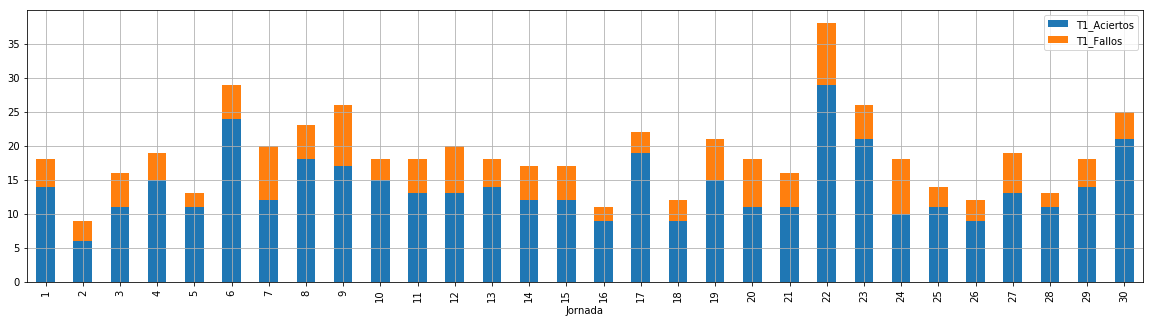

In [14]:
dt_baskonia[['Jornada', 'T1_Fallos', 'T1_Aciertos']].plot.bar(x="Jornada", 
                                                             y=["T1_Aciertos",'T1_Fallos'],
                                                             stacked=True,
                                                             figsize=[20,5], grid=True,
                                                            legend=True)
plt.show()

### Tiros de 2 puntos:
<hr>

In [15]:
mT2_lanzamientos = dt_baskonia['T2_Tiros'].median()
mT2_lanzamientos_local = dt_baskonia.loc[(dt_baskonia['LoV']=='L'), ['T2_Tiros']].mean()[0]
mT2_lanzamientos_visitante = dt_baskonia.loc[(dt_baskonia['LoV']=='V'), ['T2_Tiros']].mean()[0]

mT2_acierto = (dt_baskonia['T2_Aciertos'] * 100 / dt_baskonia['T2_Tiros']).mean()
mT2_acierto_local = dt_baskonia.loc[(dt_baskonia['LoV']=='L'), ['T2_Aciertos']].sum()[0] * 100 / dt_baskonia.loc[(dt_baskonia['LoV']=='L'), ['T2_Tiros']].sum()[0]
mT2_acierto_visitante = dt_baskonia.loc[(dt_baskonia['LoV']=='V'), ['T2_Aciertos']].sum()[0] * 100 / dt_baskonia.loc[(dt_baskonia['LoV']=='V'), ['T2_Tiros']].sum()[0]


datos_T2 = { 'T2': ['Total', 'Local', 'Visitante'],
          'Lanzamientos' : [mT2_lanzamientos, mT2_lanzamientos_local,mT2_lanzamientos_visitante], 
          '% Acierto' : [mT2_acierto,mT2_acierto_local,mT2_acierto_visitante]}

dt_T2 = pd.DataFrame(datos_T2)
dt_T2

,T2,Lanzamientos,% Acierto
0,Total,40.000000,55.358273
1,Local,39.428571,53.804348
2,Visitante,37.500000,56.500000


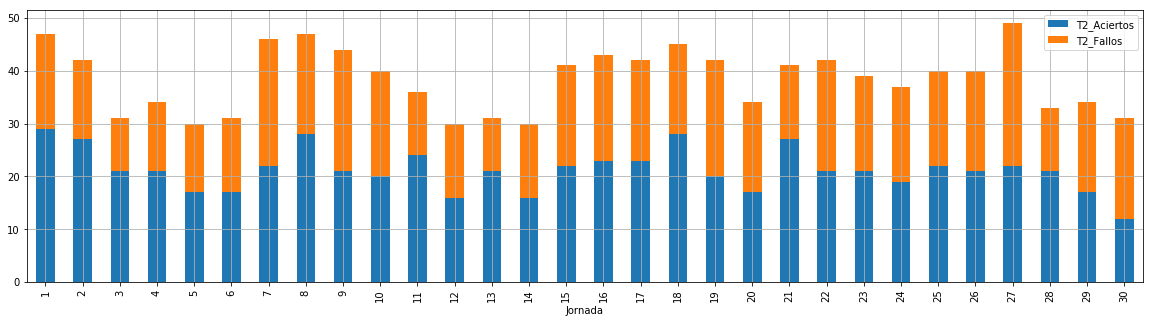

In [16]:
dt_baskonia[['Jornada', 'T2_Fallos', 'T2_Aciertos']].plot.bar(x="Jornada", 
                                                             y=["T2_Aciertos",'T2_Fallos'],
                                                             stacked=True,
                                                             figsize=[20,5], grid=True,
                                                            legend=True)
plt.show()

### Tiros de 3 puntos:
<hr>

In [17]:
mT3_lanzamientos = dt_baskonia['T3_Tiros'].median()
mT3_lanzamientos_local = dt_baskonia.loc[(dt_baskonia['LoV']=='L'), ['T3_Tiros']].mean()[0]
mT3_lanzamientos_visitante = dt_baskonia.loc[(dt_baskonia['LoV']=='V'), ['T3_Tiros']].mean()[0]

mT3_acierto = (dt_baskonia['T3_Aciertos'] * 100 / dt_baskonia['T3_Tiros']).mean()
mT3_acierto_local = dt_baskonia.loc[(dt_baskonia['LoV']=='L'), ['T3_Aciertos']].sum()[0] * 100 / dt_baskonia.loc[(dt_baskonia['LoV']=='L'), ['T3_Tiros']].sum()[0]
mT3_acierto_visitante = dt_baskonia.loc[(dt_baskonia['LoV']=='V'), ['T3_Aciertos']].sum()[0] * 100 / dt_baskonia.loc[(dt_baskonia['LoV']=='V'), ['T3_Tiros']].sum()[0]


datos_T3 = { 'T2': ['Total', 'Local', 'Visitante'],
          'Lanzamientos' : [mT3_lanzamientos, mT3_lanzamientos_local, mT3_lanzamientos_visitante], 
          '% Acierto' : [mT3_acierto,mT3_acierto_local, mT3_acierto_visitante]}

dt_T3 = pd.DataFrame(datos_T3)
dt_T3

,T2,Lanzamientos,% Acierto
0,Total,25.000000,34.447080
1,Local,25.285714,35.593220
2,Visitante,25.562500,32.762836


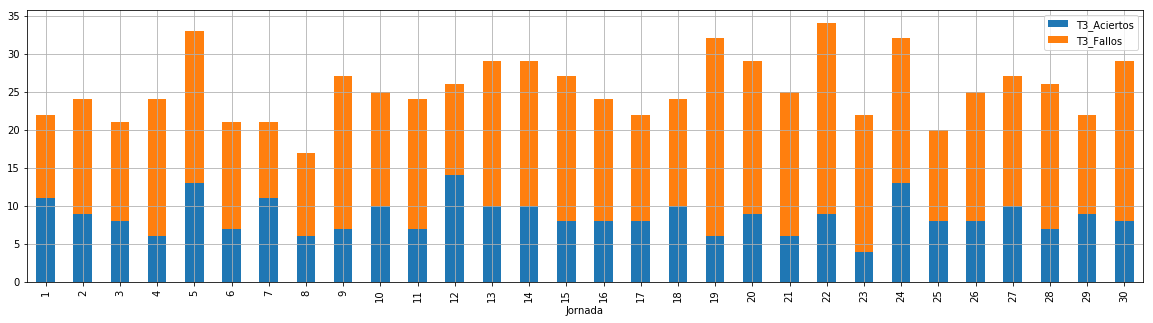

In [18]:
dt_baskonia[['Jornada', 'T3_Fallos', 'T3_Aciertos']].plot.bar(x="Jornada", 
                                                             y=["T3_Aciertos",'T3_Fallos'],
                                                             stacked=True,
                                                             figsize=[20,5], grid=True,
                                                            legend=True)
plt.show()

Con estos datos, me da la sensación de que jugar en casa o fuera de casa no hace que tengamos mejor o peor porcentaje de acierto, ni en tiros de 1, de 2 o de 3.
En alguna ocasión he oido a muchos entrenadores que la diferencia está en la defensa.

Hasta ahora, no tenemos datos de qasistencias, tapones, balones recuperados, rebotes o faltas. Como esto es un simple ejemplo, de momento no vamos a recuperar esta información.


Por último vamos a analizar la média de valoración.
### Valoración
<hr>


In [24]:
m_valoración = dt_baskonia['Valoración'].median()
m_valoración_local = dt_baskonia.loc[(dt_baskonia['LoV']=='L'), ['Valoración']].mean()[0]
m_valoración_visitante = dt_baskonia.loc[(dt_baskonia['LoV']=='V'), ['Valoración']].mean()[0]

dt_m_valoración = { 'Valoracion': ['Media', 'Local', 'Visitante'],
          'Resultados' : [m_valoración, m_valoración_local, m_valoración_visitante]}
          

dt_m_valoración = pd.DataFrame(dt_m_valoración)
dt_m_valoración

,Valoracion,Resultados
0,Media,87.500000
1,Local,94.071429
2,Visitante,85.625000


Después de ver la média de valoración, vemos que al jugar como local tenemos una valoración algo por encima de la media de valoración como visitante. 

Si hemos visto que la diferencia de tiros/acierto varía poco respecto de jugar cómo visitante, algo nos hace intuir que la diferencia está en la defensa.
Tal vez, jugar como local hace fortalecer la defensa y hace que la selección de tiro del equipo ribar sea peor, los robos de balón o rebotes defensivos sean mejores.